Анализ и прогнозирование неоднородных временных рядов, БИ

НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №4. Математическая статистика в анализе данных

Задание выполнил(а): Куликова Ульяна

### Задание 1


Проанализировать набор данных и ответить на следующий вопрос:

1) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
data = pd.read_csv('test_1_1.csv', delimiter = ';')
data = data.drop('Unnamed: 0', axis = 1)
data

,metrics
0,1
1,1
2,4
3,1
4,1
...,...
306834,8
306835,11
306836,1
306837,81


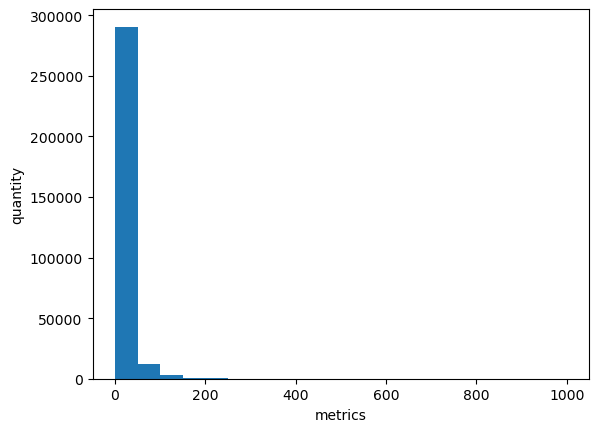

In [2]:
plt.hist(data['metrics'], bins = 20)
plt.xlabel('metrics')
plt.ylabel('quantity')
plt.show()

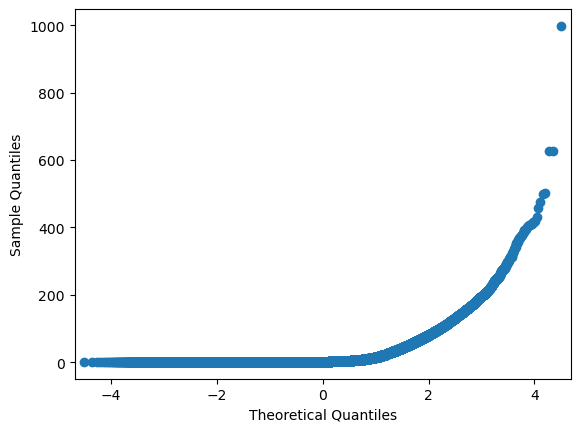

In [3]:
from statsmodels.api import qqplot
graph = qqplot(data['metrics'])

Данные распределены экспоненциально, тк график схож с графиком экспоненциального распределения, а тест на хи-квадрат, график которого похож на экспоненциальное, вывел 0.

In [4]:
from scipy.stats import chisquare
chisquare(data)

Power_divergenceResult(statistic=array([15483564.8944349]), pvalue=array([0.]))

### Задание 2



Определить, можно сравнить две представленные выборки t критерием Стьюдента? 

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать 

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

*Вместе с ответом на задание приложить код*

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
data = pd.read_csv('test_1_2.csv', delimiter = ';')
data = data.drop('Unnamed: 0', axis = 1)
data

,variant,metrics
0,A,1
1,B,1
2,A,4
3,B,37
4,B,4
...,...,...
184199,A,12
184200,A,8
184201,B,11
184202,B,81


Для того, чтобы воспользоваться t-тестом, нужно сначала проверить распределение данных на нормальность. Это можно сделать разными способами, сначала воспользуемся критерием Шапиро-Уилка.

In [6]:
from scipy.stats import shapiro
X_1 = data[(data['variant'] == 'A')]['metrics']
Y_1 = data[(data['variant'] == 'B')]['metrics']
shapiro(X_1)
shapiro(Y_1)

/Users/kulikovaulyaa/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.450661301612854, pvalue=0.0)

Результаты критерия Шапиро показали, что данные не распределены по нормальному закону, но точность этого критерия при количестве элементов в выборке > 5000 не точное, поэтому воспользуемся построением графика Q-Q plot

In [6]:
X_1.mean(), Y_1.mean(), X_1.std(), Y_1.std()

(10.099561961892842, 10.33313665071352, 23.130148232686025, 22.86069501030269)

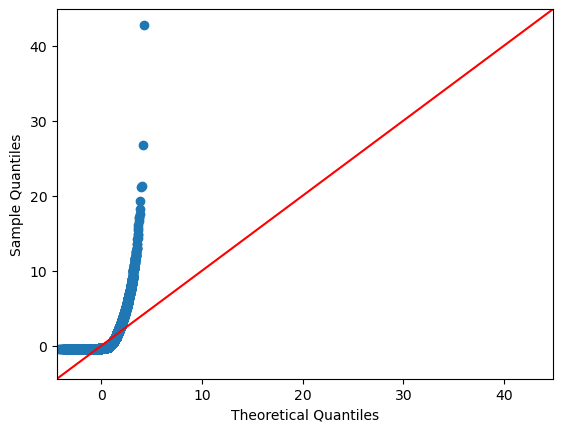

In [42]:
from statsmodels.api import qqplot
fig = qqplot(X_1, line='45', fit=True)

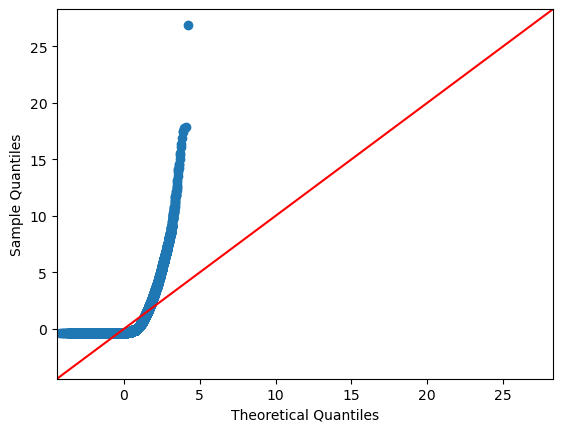

In [43]:
from statsmodels.api import qqplot
fig1 = qqplot(Y_1, line='45', fit=True)

Оба графика показывают, что данные не распределены по нормальному закону, значит, воспользоваться t-критерием нежелательно.

Вместо t-критерия воспользуемся z-тестом, т.к размеры выборок относительно большие, и z-тест подходит для данных, подчиняющимся любым законам распределения.

In [7]:
from statsmodels. stats.weightstats import ztest as ztest
ztest(X_1, Y_1) #уровень значимости = 0.05 > 0.029, поэтому нулевая гипотеза отклоняется. в данном случае нулевой гипотезой будет отсутствие статистической значимости различий между средними в выборках 

(-2.179573994371754, 0.029289054235422454)

### Задание 3



Дано две выборки по А/Б тесту.

Две выборки несбалансированные - кол-во пользователей в каждой группе разные.

Метрика, которую меряем в эксперименте (и которую используем для определения группы, которая лучше себя показала) - кол-во просмотренных страниц на пользователя 

Как вы будете принимать решение, какая группа лучше А или Б, и какие статистические методы (критерии) вы будете использовать, какие преобразования к данным применять? P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и работу с несбалансированными выборками

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv('hw2_test_1_3.csv', delimiter = ';')
data = data.drop('Unnamed: 0', axis = 1)
data

,variant,metrics
0,A,1
1,A,4
2,A,15
3,A,1
4,A,10
...,...,...
108094,D,1
108095,A,1
108096,A,12
108097,A,8


In [11]:
M1 = data[(data['variant'] == 'A')]['metrics']
M2 = data[(data['variant'] == 'D')]['metrics']
M1.mean(), M2.mean()

(10.099561961892842, 9.942386297281516)

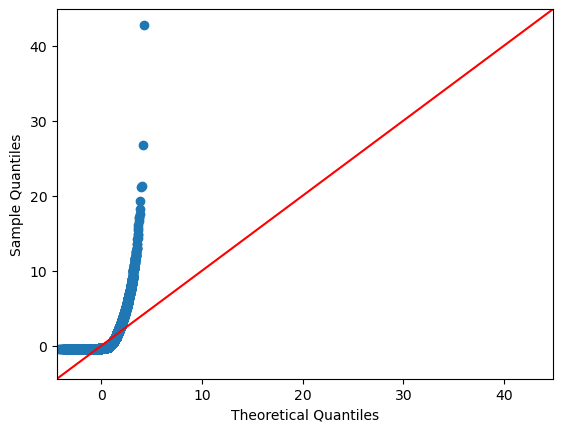

In [12]:
from statsmodels.api import qqplot
fig1 = qqplot(M1, line='45', fit=True)

Воспользуемся критерием Манна-Уитни, т.к он является непараметрическим аналогом t-теста для данных, не распределенных нормально. Непараметрические тесты не дают никакого предположения о параметрах распределения.

In [13]:
import scipy.stats as stats
stats. mannwhitneyu (M1, M2)

MannwhitneyuResult(statistic=710155085.5, pvalue=0.2291154549185962)

p-value > 0.05. Значит, нет оснований отклонить нулевую гипотезу. Нулевая гипотеза в этом задании - различий между группами А и В нет.

Проверим результаты критерия Манна-Уитни z-тестом, тк он тоже подходит в этом случае.

In [14]:
from statsmodels. stats.weightstats import ztest as ztest
ztest(M1, M2)

(0.7874553679694078, 0.431015345770826)

p-value > 0.05 значит, снова нет оснований отклонить нулевую гипотезу

Оба теста показали значение p-value > 0.05. Значит, особых изменений и различий между группами нет, и нулевая гипотеза не отклоняется, откуда мы делаем вывод, что тестовая группа не лучше контрольной.

### Задание 4



Есть данные с большой дисперсии у метрики (диспресию метрики можно посчитать для каждой группы). Для их дальнейшего анализа дисперсию необходимо сократить. Как определить, что дисперсия действительно большая? Если она большая, как вы будете ее чистить? Ответ аргументировать и описать.  P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и снижение дисперсии в них

Описание данных: 

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

*Вместе с ответом на задание приложить код*

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
data = pd.read_csv('test_1_1.csv', delimiter = ';')
data = data.drop('Unnamed: 0', axis = 1)
data

,metrics
0,1
1,1
2,4
3,1
4,1
...,...
306834,8
306835,11
306836,1
306837,81


Дисперсия зависит от числа экспериментов. Чем больше наблюдений, тем меньше дисперсия. В данном случае дисперсия большая, тк разброс значений достаточно сильный, он отражен на графике.

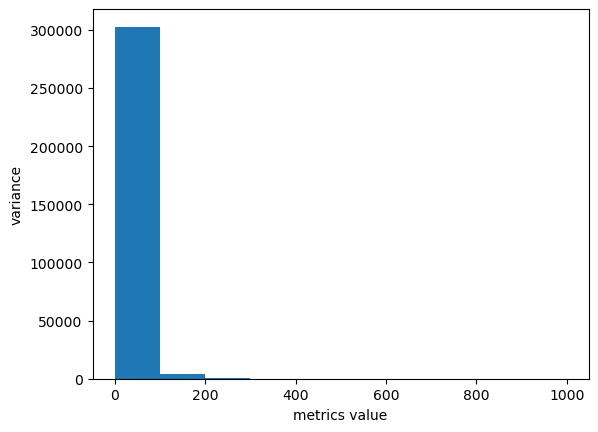

In [114]:
plt.hist(data['metrics'], bins = 10)
plt.xlabel('metrics value')
plt.ylabel('variance')
plt.show()

Воспользуемся логарифмическим преобразованием данных, в результате которых снизится дисперсия.

In [111]:
from scipy.stats import boxcox
data_b = boxcox(data, 0) 
data_b

,metrics
0,0.000000
1,0.000000
2,1.386294
3,0.000000
4,0.000000
...,...
306834,2.079442
306835,2.397895
306836,0.000000
306837,4.394449


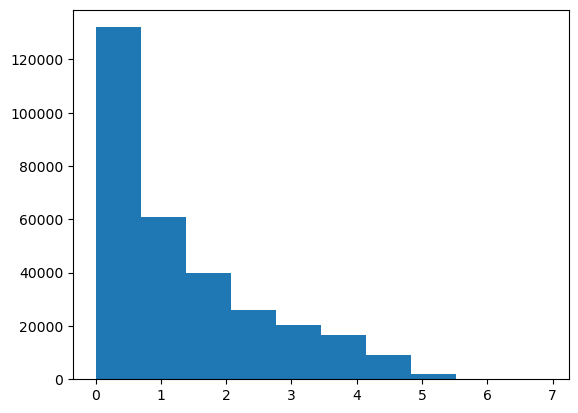

In [112]:
plt.hist(data_b, bins = 10)
plt.show()

Сравнивая 2 гистограммы, можно заметить, что дисперсия действительно снизилась. Для еще большего понижения можно установить фильтр и удалить выбросы в данных.

### Задание 5



Есть эксперимент с поисковыми подсказками. Вы хотите узнать, как изменился CTR в каждой группе эксперимента.

**Данные**

- id - уникальный идентификатор пользователя
- action -
- view - кол-во просмотров на одну сессию
- variant - вариант a/b теста, где 0 - это версия "A", 1 -  версия "B".

**Задача**

- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

**Данные** 

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)

In [5]:
data = pd.read_csv('task5.csv', delimiter = ',')
data

,id,variant,view,action
0,88258,A,10,2
1,109938,A,3,1
2,117644,A,7,5
3,374080,A,9,9
4,662082,A,1,1
...,...,...,...,...
8186,7706713,B,1,1
8187,7875223,B,1,1
8188,4617329,B,9,4
8189,5394863,B,5,1


Метрика - количество просмотров за одну сессию пользователя, а Action может быть количество кликов. \
Тогда CTR рассчитывается как кол-во кликов / кол-во показов * 100

In [7]:
data['CTR'] = round(data['action'] / data['view'] * 100)
data

,id,variant,view,action,CTR
0,88258,A,10,2,20.0
1,109938,A,3,1,33.0
2,117644,A,7,5,71.0
3,374080,A,9,9,100.0
4,662082,A,1,1,100.0
...,...,...,...,...,...
8186,7706713,B,1,1,100.0
8187,7875223,B,1,1,100.0
8188,4617329,B,9,4,44.0
8189,5394863,B,5,1,20.0


Проверим данные на нормальность критерием Шапиро

In [9]:
M1 = data[(data['variant'] == 'A')]['CTR']
M2 = data[(data['variant'] == 'B')]['CTR']

In [10]:
from scipy.stats import shapiro
shapiro(M1)
shapiro(M2)

ShapiroResult(statistic=0.7789279818534851, pvalue=0.0)

p-value = 0 < 0.05 значит, отклоняем гипотезу о нормальности

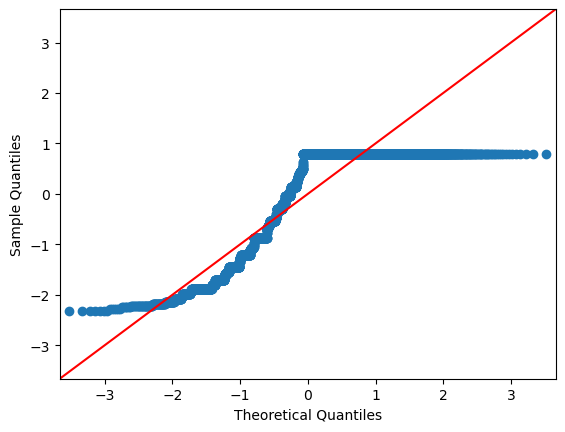

In [11]:
from statsmodels.api import qqplot
fig1 = qqplot(M1, line='45', fit=True)

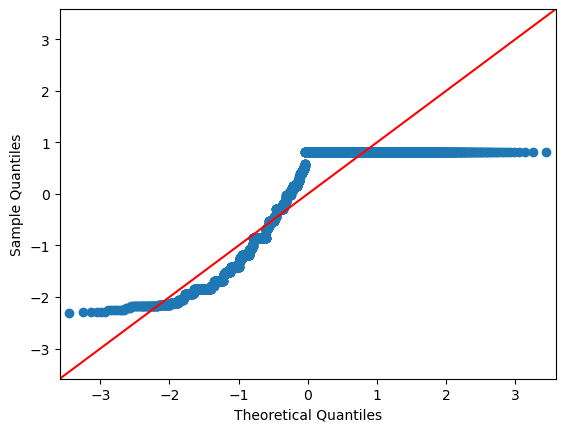

In [12]:
from statsmodels.api import qqplot
fig1 = qqplot(M2, line='45', fit=True)

Данные не распределены нормально, поэтому лучше будет воспользоваться z-тестом, тк он подходит для любых распределений.

In [13]:
from statsmodels. stats.weightstats import ztest as ztest
ztest(M1, M2)

(0.7519482960605511, 0.4520821526384441)

p-value > 0.05. \
Следовательно, нет оснований отклонять нулевую гипотезу об отсутствии различий между этими двумя группами, т.е нулевая гипотеза - CTR в обеих группах не различается. \
Соответственно, мы можем сказать, что CTR тестовой группы не превосходит CTR контрольной группы, и сама метрика CTR не выросла в результате имплементации каких-то изменений.